# Requirements Elicitation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

# Load the CSV file
file_path = "requirements_elicitation.csv"
df = pd.read_csv(file_path)

# Clean up
clean_df = df.iloc[3:].copy() # The first three rows are removed because they are metadata + a test
print(clean_df.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q2', 'Q3', 'Q4_1', 'Q4_2',
       'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q5_1', 'Q5_2',
       'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q5_8', 'Q5_9', 'rank1',
       'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9'],
      dtype='object')


In [59]:
custom_color = "#006ae3"
font = "Times New Roman"
titelsize = 14
labelsize = 12
# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

## Role

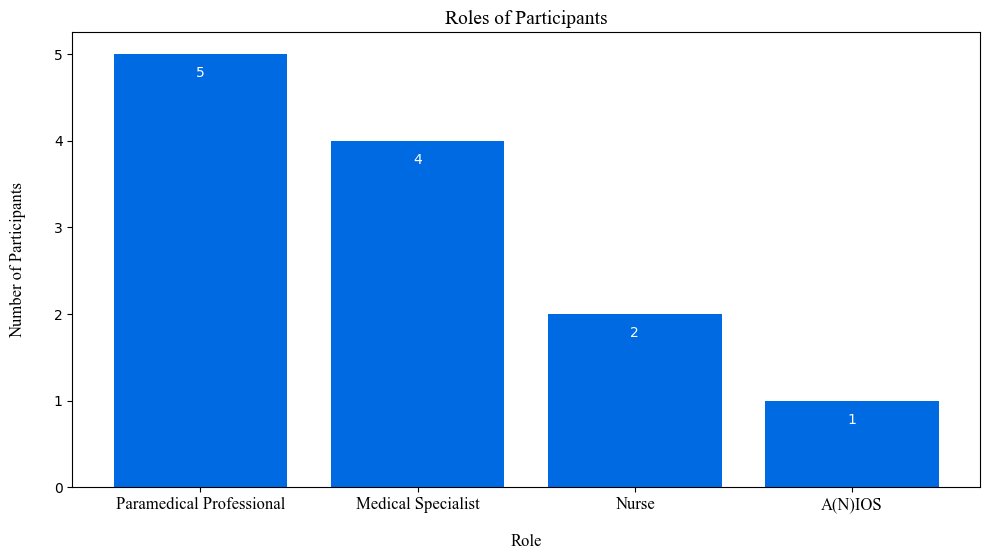

In [4]:
import matplotlib.pyplot as plt

# Extract roles from clean_df
roles = clean_df["Q2"]

# Replace long label with shorter one
roles = roles.replace({
    "Paramedisch beroep (bijv. diëtist of fysiotherapeut)": "Paramedical Professional",
    "Medisch specialist": "Medical Specialist",
    "Verpleegkundige": "Nurse"
})

# Count responses and sort by count descending
role_counts = roles.value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(role_counts.index, role_counts.values, color=custom_color)

# Add value labels slightly below the top margin
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.3, str(int(height)),
             ha='center', va='bottom', fontsize=10, color='white')

# Improve axis labels
plt.title("Roles of Participants", fontsize=14, fontname=font)
plt.xlabel("Role", fontsize=12, labelpad=15, fontname=font)
plt.ylabel("Number of Participants", fontsize=12, labelpad=20, fontname=font)

# Adjust tick label sizes
plt.xticks(fontsize=12, fontname=font)
plt.yticks(fontsize=10)

# Make sure everything fits
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust top margin

plt.show()

## Ranking

In [5]:
rank_cols = [f"rank{i}" for i in range(1, 10)]
ranks_df = clean_df[rank_cols].dropna(how="all")

In [6]:
ranks_df

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va..."
4,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Hoe?"" - de onderliggende logica en werking va...","""Wat als?"" - welk advies het systeem zou geven...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
5,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst..."
6,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoe?"" - de onderliggende logica en werking va...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
7,"""Data"" - de gegevens waarop het systeem gebase...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Output"" - de adviezen/uitkomsten die het syst..."
8,"""Hoe?"" - de onderliggende logica en werking va...","""Output"" - de adviezen/uitkomsten die het syst...","""Data"" - de gegevens waarop het systeem gebase...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Wat als?"" - welk advies het systeem zou geven..."
9,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
10,"""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
11,"""Hoe?"" - de onderliggende logica e

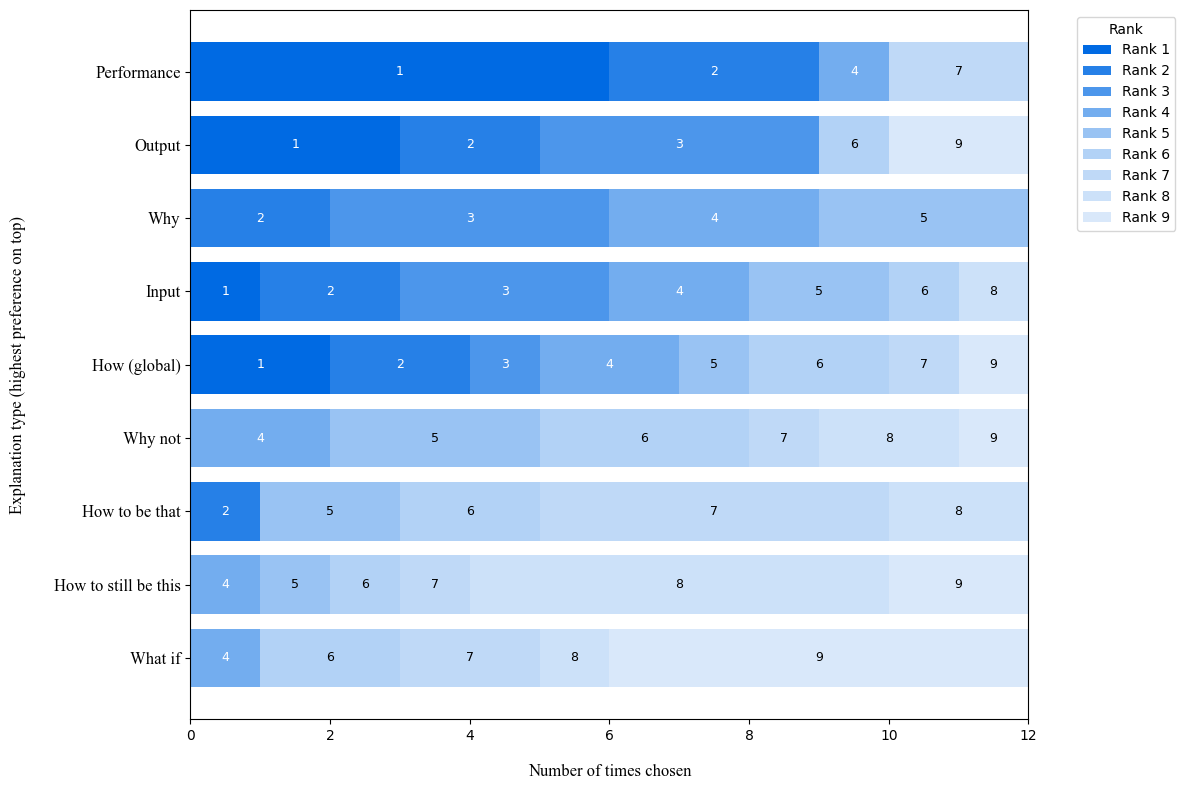

In [7]:
def extract_short(text):
    match = re.search(r'"(.*?)"', str(text))
    return match.group(1) if match else str(text)

for col in rank_cols:
    ranks_df[col] = ranks_df[col].apply(extract_short)

# --- Step 2: Translate explanation types from Dutch to English ---
explanation_translation = {
    "Prestatie": "Performance",
    "Data": "Input",
    "Waarom?": "Why",
    "Hoe?": "How (global)",
    "Output": "Output",
    "Hoeveel kan er veranderen zonder dat?": "How to still be this",
    "Waarom niet?": "Why not",
    "Hoeveel/wat moet er veranderen zodat?": "How to be that",
    "Wat als?": "What if"
}

# --- Step 3: Prepare long format and compute average ranks ---
long_df = pd.melt(ranks_df, value_vars=rank_cols, var_name="rank_position", value_name="explanation")
long_df["rank_num"] = long_df["rank_position"].str.extract(r"(\d+)").astype(int)
avg_ranks = long_df.groupby("explanation")["rank_num"].mean().sort_values()

# --- Step 4: Count how often each explanation was chosen per rank ---
ranking_counts = {rank: ranks_df[rank].value_counts() for rank in rank_cols}
ranking_df = pd.DataFrame(ranking_counts).fillna(0).astype(int)

# Apply short name extraction and translation to the index
ranking_df.index = ranking_df.index.to_series().apply(extract_short)
ranking_df = ranking_df.loc[avg_ranks.index]  # reorder
ranking_df.index = ranking_df.index.to_series().map(explanation_translation)  # translate
ranking_df.columns = [f"Rank {i}" for i in range(1, 10)]

# --- Step 5: Plot settings ---
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.3, 0.25, 0.2, 0.15]
fig, ax = plt.subplots(figsize=(12, 8))
bottoms = [0] * len(ranking_df)

# --- Step 6: Plot the horizontal stacked bar chart ---
for i, col in enumerate(ranking_df.columns):
    values = ranking_df[col]
    bars = ax.barh(ranking_df.index, values, left=bottoms, 
                   color= custom_color, alpha=alphas[i], label=col)
    
    for bar, val in zip(bars, values):
        if val > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                str(i + 1),  # rank number
                ha='center', va='center',
                fontsize=9, color='white' if alphas[i] > 0.4 else 'black'
            )
    
    bottoms = [bottoms[j] + values.iloc[j] for j in range(len(values))]

# --- Final touches ---
ax.invert_yaxis()
ax.set_xlabel("Number of times chosen", fontsize=12, labelpad=15, fontname="Times New Roman")
ax.set_ylabel("Explanation type (highest preference on top)", fontsize=12, labelpad=20, fontname="Times New Roman")
plt.yticks(fontsize=labelsize, fontname=font)
ax.legend(title="Rank", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
# Rank column names
rank_cols = [f"Rank {i}" for i in range(1, 10)]

# Calculate average rank and standard deviation
average_ranks = []
std_devs = []

for _, row in ranking_df.iterrows():
    counts = row[rank_cols].values.astype(int)  # ensure integer counts
    values = np.repeat(np.arange(1, len(rank_cols)+1), counts)  # repeat rank numbers
    average_ranks.append(round(values.mean(), 2))
    std_devs.append(round(values.std(), 2))

# Add results to DataFrame
ranking_df['Average Rank'] = average_ranks
ranking_df['Standard Deviation'] = std_devs

# Output the final DataFrame
print(ranking_df[['Average Rank', 'Standard Deviation']])

                      Average Rank  Standard Deviation
explanation                                           
Performance                   2.50                2.18
Output                        3.58                2.75
Why                           3.58                1.04
Input                         3.83                1.86
How (global)                  4.17                2.41
Why not                       6.08                1.55
How to be that                6.25                1.59
How to still be this          7.33                1.49
What if                       7.67                1.60


In [24]:
# Convert each row to a dictionary of {info_type: rank}
restructured_data = []
for row in ranks_df.itertuples(index=False):
    participant_dict = {info_type: rank + 1 for rank, info_type in enumerate(row)}
    restructured_data.append(participant_dict)

# Create the new DataFrame
transformed_df = pd.DataFrame(restructured_data)

# Reorder the columns
transformed_df.columns = ['Performance', 'Input', 'Output', 'How to still be this', 'Why', 'What if', 'How to be that', 'Why not', 'How']
transformed_df

,Performance,Input,Output,How to still be this,Why,What if,How to be that,Why not,How
0,1,2,3,4,5,6,7,8,9
1,2,3,1,9,4,6,8,7,5
2,1,8,9,6,3,7,5,4,2
3,1,5,3,8,2,9,7,6,4
4,7,1,9,5,3,4,6,8,2
5,4,3,2,7,5,9,8,6,1
6,2,4,1,8,3,9,7,5,6
7,7,3,1,9,4,8,2,5,6
8,2,5,3,8,4,7,6,9,1
9,1,6,2,8,3,9,5,4,7


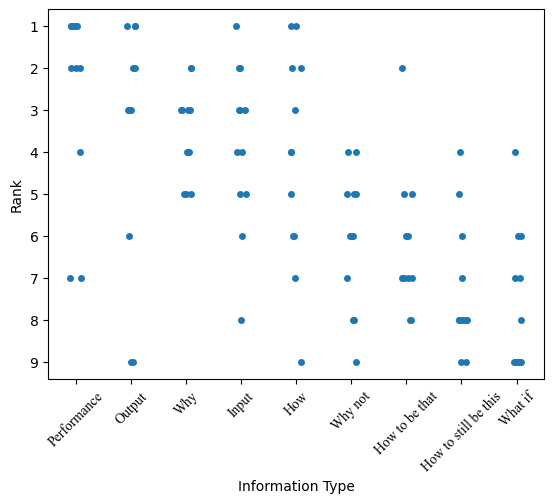

In [ ]:
# Melt the DataFrame to long format
df_melted = transformed_df.melt(var_name='Information Type', value_name='Rank')

# Calculate mean rank per Information Type
order = df_melted.groupby('Information Type')['Rank'].mean().sort_values().index

# Create the violin plot with sorted x-axis
sns.stripplot(data=df_melted, x="Information Type", y="Rank", jitter=True, order=order)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

## 100 dollar Method

In [12]:
point_columns = [f"rank{i}" for i in list(range(1,10))]
rank_cols


['Rank 1',
 'Rank 2',
 'Rank 3',
 'Rank 4',
 'Rank 5',
 'Rank 6',
 'Rank 7',
 'Rank 8',
 'Rank 9']

In [13]:
clean_df[point_columns]

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va..."
4,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Hoe?"" - de onderliggende logica en werking va...","""Wat als?"" - welk advies het systeem zou geven...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
5,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst..."
6,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoe?"" - de onderliggende logica en werking va...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
7,"""Data"" - de gegevens waarop het systeem gebase...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Output"" - de adviezen/uitkomsten die het syst..."
8,"""Hoe?"" - de onderliggende logica en werking va...","""Output"" - de adviezen/uitkomsten die het syst...","""Data"" - de gegevens waarop het systeem gebase...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Wat als?"" - welk advies het systeem zou geven..."
9,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
10,"""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
11,"""Hoe?"" - de onderliggende logica e

In [14]:
clean_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q5_9,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,2025-04-04 11:05:03,2025-04-04 11:14:24,IP Address,5.59.202.8,100,560,True,2025-04-04 11:14:26,R_8fOdjeQ2gYAkL1W,NaN,...,0,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va..."
4,2025-04-04 20:21:58,2025-04-04 20:28:50,IP Address,89.98.60.211,100,412,True,2025-04-04 20:28:51,R_2xRlovdL1cf7E89,NaN,...,6,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Hoe?"" - de onderliggende logica en werking va...","""Wat als?"" - welk advies het systeem zou geven...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
5,2025-04-05 15:50:07,2025-04-05 15:56:03,IP Address,217.121.70.214,100,355,True,2025-04-05 15:56:03,R_2zdq3AoeVrxSKOM,NaN,...,0,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst..."
6,2025-04-05 16:10:12,2025-04-05 16:13:09,IP Address,212.145.147.45,100,176,True,2025-04-05 16:13:09,R_8imQbqAwYLwRTwn,NaN,...,0,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoe?"" - de onderliggende logica en werking va...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
7,2025-04-06 09:09:22,2025-04-06 09:16:28,IP Address,217.121.12.182,100,425,True,2025-04-06 09:16:29,R_1pmzw99YSapCMmk,NaN,...,10,"""Data"" - de gegevens waarop het systeem gebase...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Output"" - de adviezen/uitkomsten die het syst..."
8,2025-04-05 03:13:15,2025-04-07 04:15:58,IP Address,145.89.170.180,100,176562,True,2025-04-07 04:15:58,R_2n2JFzV0DiG8B8J,NaN,...,1,"""Hoe?"" - de onderliggende logica en werking va...","""Output"" - de adviezen/uitkomsten die het syst...","""Data"" - de gegevens waarop het systeem gebase...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Wat als?"" - welk advies het systeem zou geven..."
9,2025-04-09 07:29:35,2025-04-09 07:33:38,IP Address,80.113.200.135,100,243,True,2025-04-09 07:33:39,R_8CvxeaBBaHHlhKz,NaN,...,0,""

In [15]:
# Redefine rank_cols because they are different in clean_df
rank_cols = [f"rank{i}" for i in list(range(1,10))]

# Transform the values by making them shorter and map with English translation
for col in rank_cols:
    clean_df[col] = clean_df[col].apply(extract_short).map(explanation_translation)

clean_df[rank_cols]

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,Performance,Input,Output,How to still be this,Why,What if,How to be that,Why not,How (global)
4,Output,Performance,Input,Why,How (global),What if,Why not,How to be that,How to still be this
5,Performance,How (global),Why,Why not,How to be that,How to still be this,What if,Input,Output
6,Performance,Why,Output,How (global),Input,Why not,How to be that,How to still be this,What if
7,Input,How (global),Why,What if,How to still be this,How to be that,Performance,Why not,Output
8,How (global),Output,Input,Performance,Why,Why not,How to still be this,How to be that,What if
9,Output,Performance,Why,Input,Why not,How (global),How to be that,How to still be this,What if
10,Output,How to be that,Input,Why,Why not,How (global),Performance,What if,How to still be this
11,How (global),Performance,Output,Why,Input,How to be that,What if,How to still be this,Why not
12,Performance,Output,Why,Why not,How to be that,Input,How (global),How to still be this,What if


In [16]:
# Step 1: Create dictionary to store a list of points per explanation type
explanation_points = {}

# Step 2: Loop through each respondent and collect their scores per explanation
for idx in ranks_df.index:
    for i in range(1, 10):
        rank_col = f'rank{i}'
        q_col = f'Q5_{i}'
        
        explanation = clean_df[rank_cols].loc[idx, rank_col]
        points = clean_df.loc[idx, q_col]
        
        explanation_points.setdefault(explanation, []).append(float(points))

# Step 3: Convert to long-format DataFrame for analysis
explanation_points_df = pd.DataFrame(
    [
        {'Explanation': explanation, 'Points': point}
        for explanation, points_list in explanation_points.items()
        for point in points_list
    ]
)

In [17]:
explanation_points

{'Performance': [25.0,
  15.0,
  80.0,
  35.0,
  20.0,
  4.0,
  16.0,
  15.0,
  nan,
  nan,
  20.0,
  nan],
 'Input': [25.0, 15.0, 0.0, 0.0, 20.0, 10.0, 6.0, 15.0, nan, nan, 20.0, nan],
 'Output': [20.0,
  15.0,
  0.0,
  22.0,
  10.0,
  31.0,
  38.0,
  15.0,
  nan,
  nan,
  20.0,
  nan],
 'How to still be this': [10.0,
  6.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  5.0,
  nan,
  nan,
  2.0,
  nan],
 'Why': [10.0, 15.0, 3.0, 25.0, 10.0, 4.0, 18.0, 15.0, nan, nan, 10.0, nan],
 'What if': [7.0, 10.0, 0.0, 0.0, 5.0, 1.0, 0.0, 5.0, nan, nan, 1.0, nan],
 'How to be that': [3.0,
  6.0,
  1.0,
  0.0,
  5.0,
  1.0,
  2.0,
  5.0,
  nan,
  nan,
  5.0,
  nan],
 'Why not': [0.0, 6.0, 3.0, 0.0, 10.0, 4.0, 17.0, 10.0, nan, nan, 7.0, nan],
 'How (global)': [0.0,
  12.0,
  13.0,
  18.0,
  20.0,
  44.0,
  3.0,
  15.0,
  nan,
  nan,
  15.0,
  nan]}

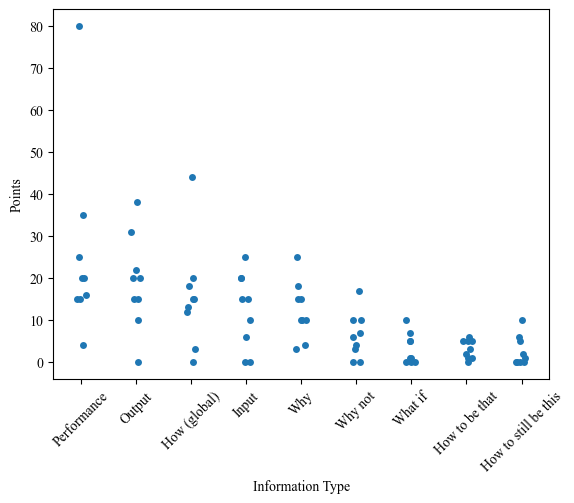

In [61]:
# Convert to a dataframe
ep_df = pd.DataFrame(explanation_points)

# Reshape for seaborn
ep_melted = ep_df.melt(var_name="Information Type", value_name ="Points")

# Drop missing values
ep_melted = ep_melted.dropna()

# Order
order = ep_melted.groupby('Information Type')['Points'].mean().sort_values(ascending=False).index

sns.stripplot(data=ep_melted, x="Information Type", y="Points", jitter=True, order=order)
plt.xticks(rotation=45)
plt.show()

In [19]:
ep_df

,Performance,Input,Output,How to still be this,Why,What if,How to be that,Why not,How (global)
0,25.0,25.0,20.0,10.0,10.0,7.0,3.0,0.0,0.0
1,15.0,15.0,15.0,6.0,15.0,10.0,6.0,6.0,12.0
2,80.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0,13.0
3,35.0,0.0,22.0,0.0,25.0,0.0,0.0,0.0,18.0
4,20.0,20.0,10.0,0.0,10.0,5.0,5.0,10.0,20.0
5,4.0,10.0,31.0,1.0,4.0,1.0,1.0,4.0,44.0
6,16.0,6.0,38.0,0.0,18.0,0.0,2.0,17.0,3.0
7,15.0,15.0,15.0,5.0,15.0,5.0,5.0,10.0,15.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Create summary dictionary
summary = {
    explanation: {
        'Total': np.nansum(points),
        'Average': np.nanmean(points),
        'Standard Deviation': np.nanstd(points, ddof=1)  # sample SD
    }
    for explanation, points in explanation_points.items()
}

# Optional: Convert to DataFrame for nicer display
summary_df = pd.DataFrame.from_dict(summary, orient='index')
summary_df = summary_df.sort_values(by='Total', ascending=False)

summary_df

,Total,Average,Standard Deviation
Performance,230.0,25.555556,22.063041
Output,171.0,19.000000,11.124298
How (global),140.0,15.555556,12.521093
Input,111.0,12.333333,8.958236
Why,110.0,12.222222,6.887993
Why not,57.0,6.333333,5.454356
What if,29.0,3.222222,3.666667
How to be that,28.0,3.111111,2.204793
How to still be this,24.0,2.666667,3.570714


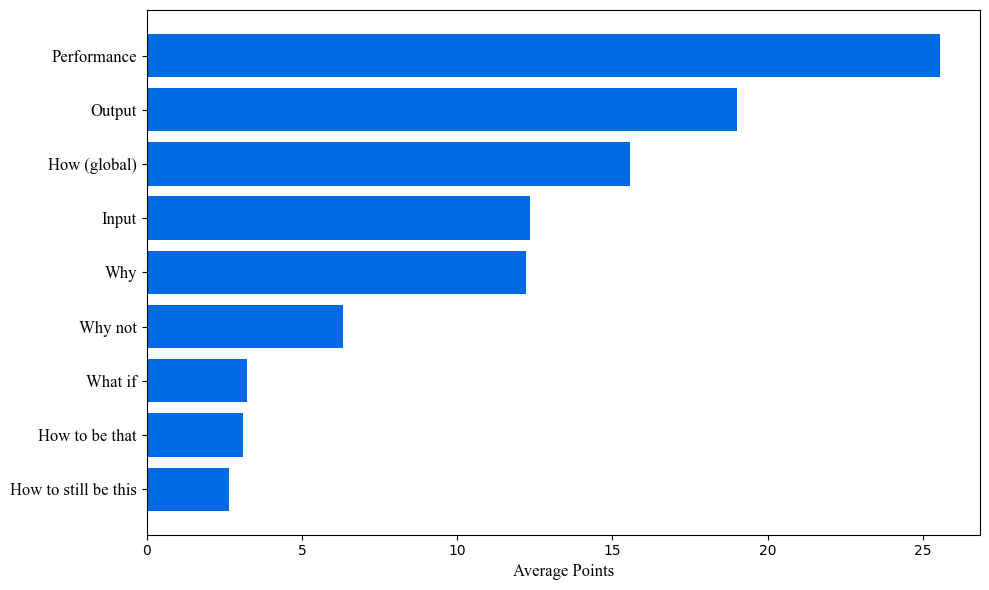

In [21]:
# Sort the DataFrame by total points for a better visual
sorted_df = summary_df.sort_values(by='Average', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_df.index, sorted_df['Average'], color=custom_color)
plt.xlabel('Average Points', fontsize=labelsize, fontname=font)
plt.yticks(fontsize=labelsize, fontname=font)
plt.tight_layout()
plt.show()